In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use({'figure.figsize':(25,20)})#图片大小
plt.rcParams['font.sans-serif'] =['SimHei']#改变字体防止中文乱码
plt.rcParams['axes.unicode_minus'] =False#正确显示负号

In [274]:
df=pd.read_csv('house_data.csv')#导入数据集

简要展示数据集的基本信息

In [275]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [276]:
print(df.shape)

(506, 14)


In [277]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [278]:
df.isnull().any().sum()

0

无缺失值

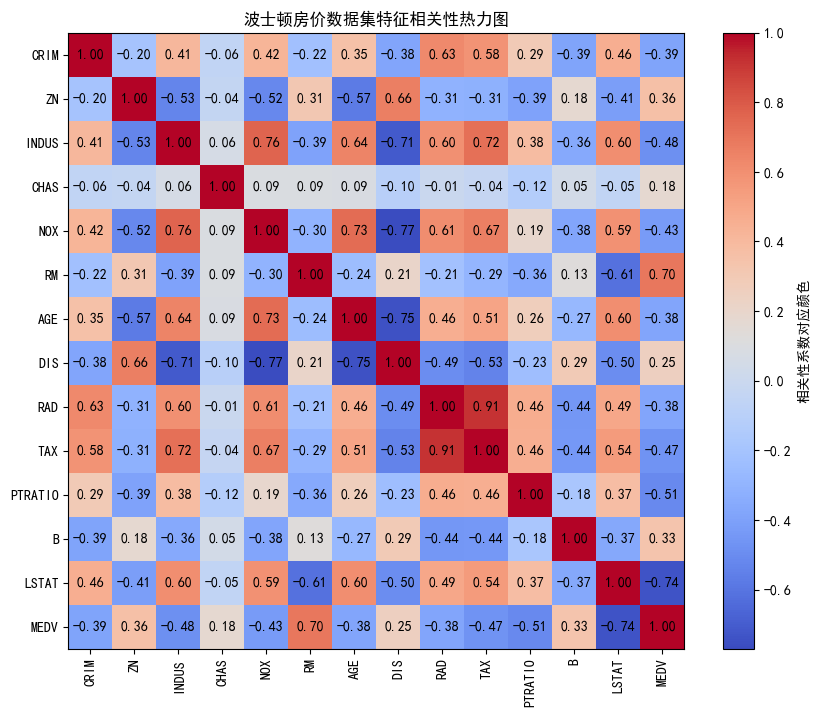

In [279]:
corr_matrix = df.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')

# 添加相关系数标注
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, "{:.2f}".format(corr_matrix.iloc[i, j]), ha='center', va='center', color='black')

plt.colorbar(label='相关性系数对应颜色')
plt.title('波士顿房价数据集特征相关性热力图')
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.show()

很好地体现了特征之间的相关性

In [280]:
plt.style.use({'figure.figsize':(15,10)})#改变图片大小

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

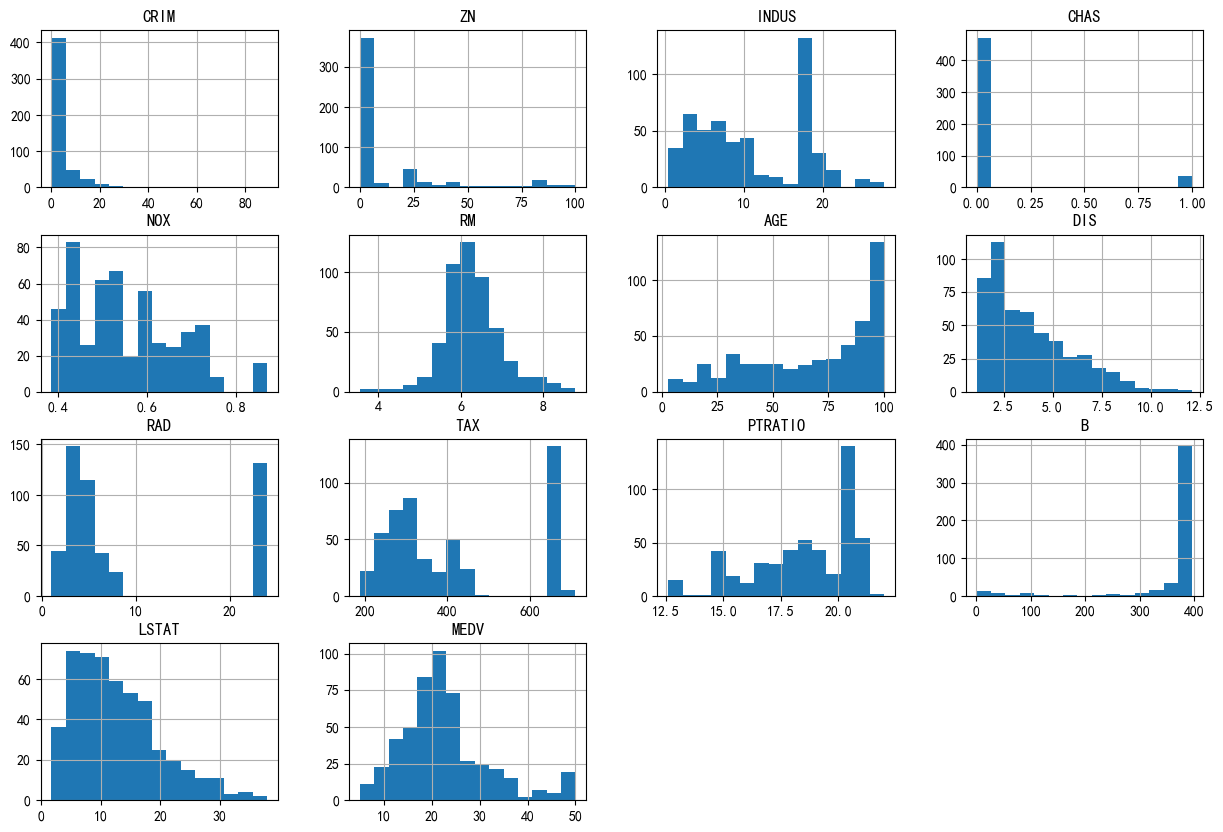

In [281]:
df.hist(bins=15)#绘画每个特征的直方图

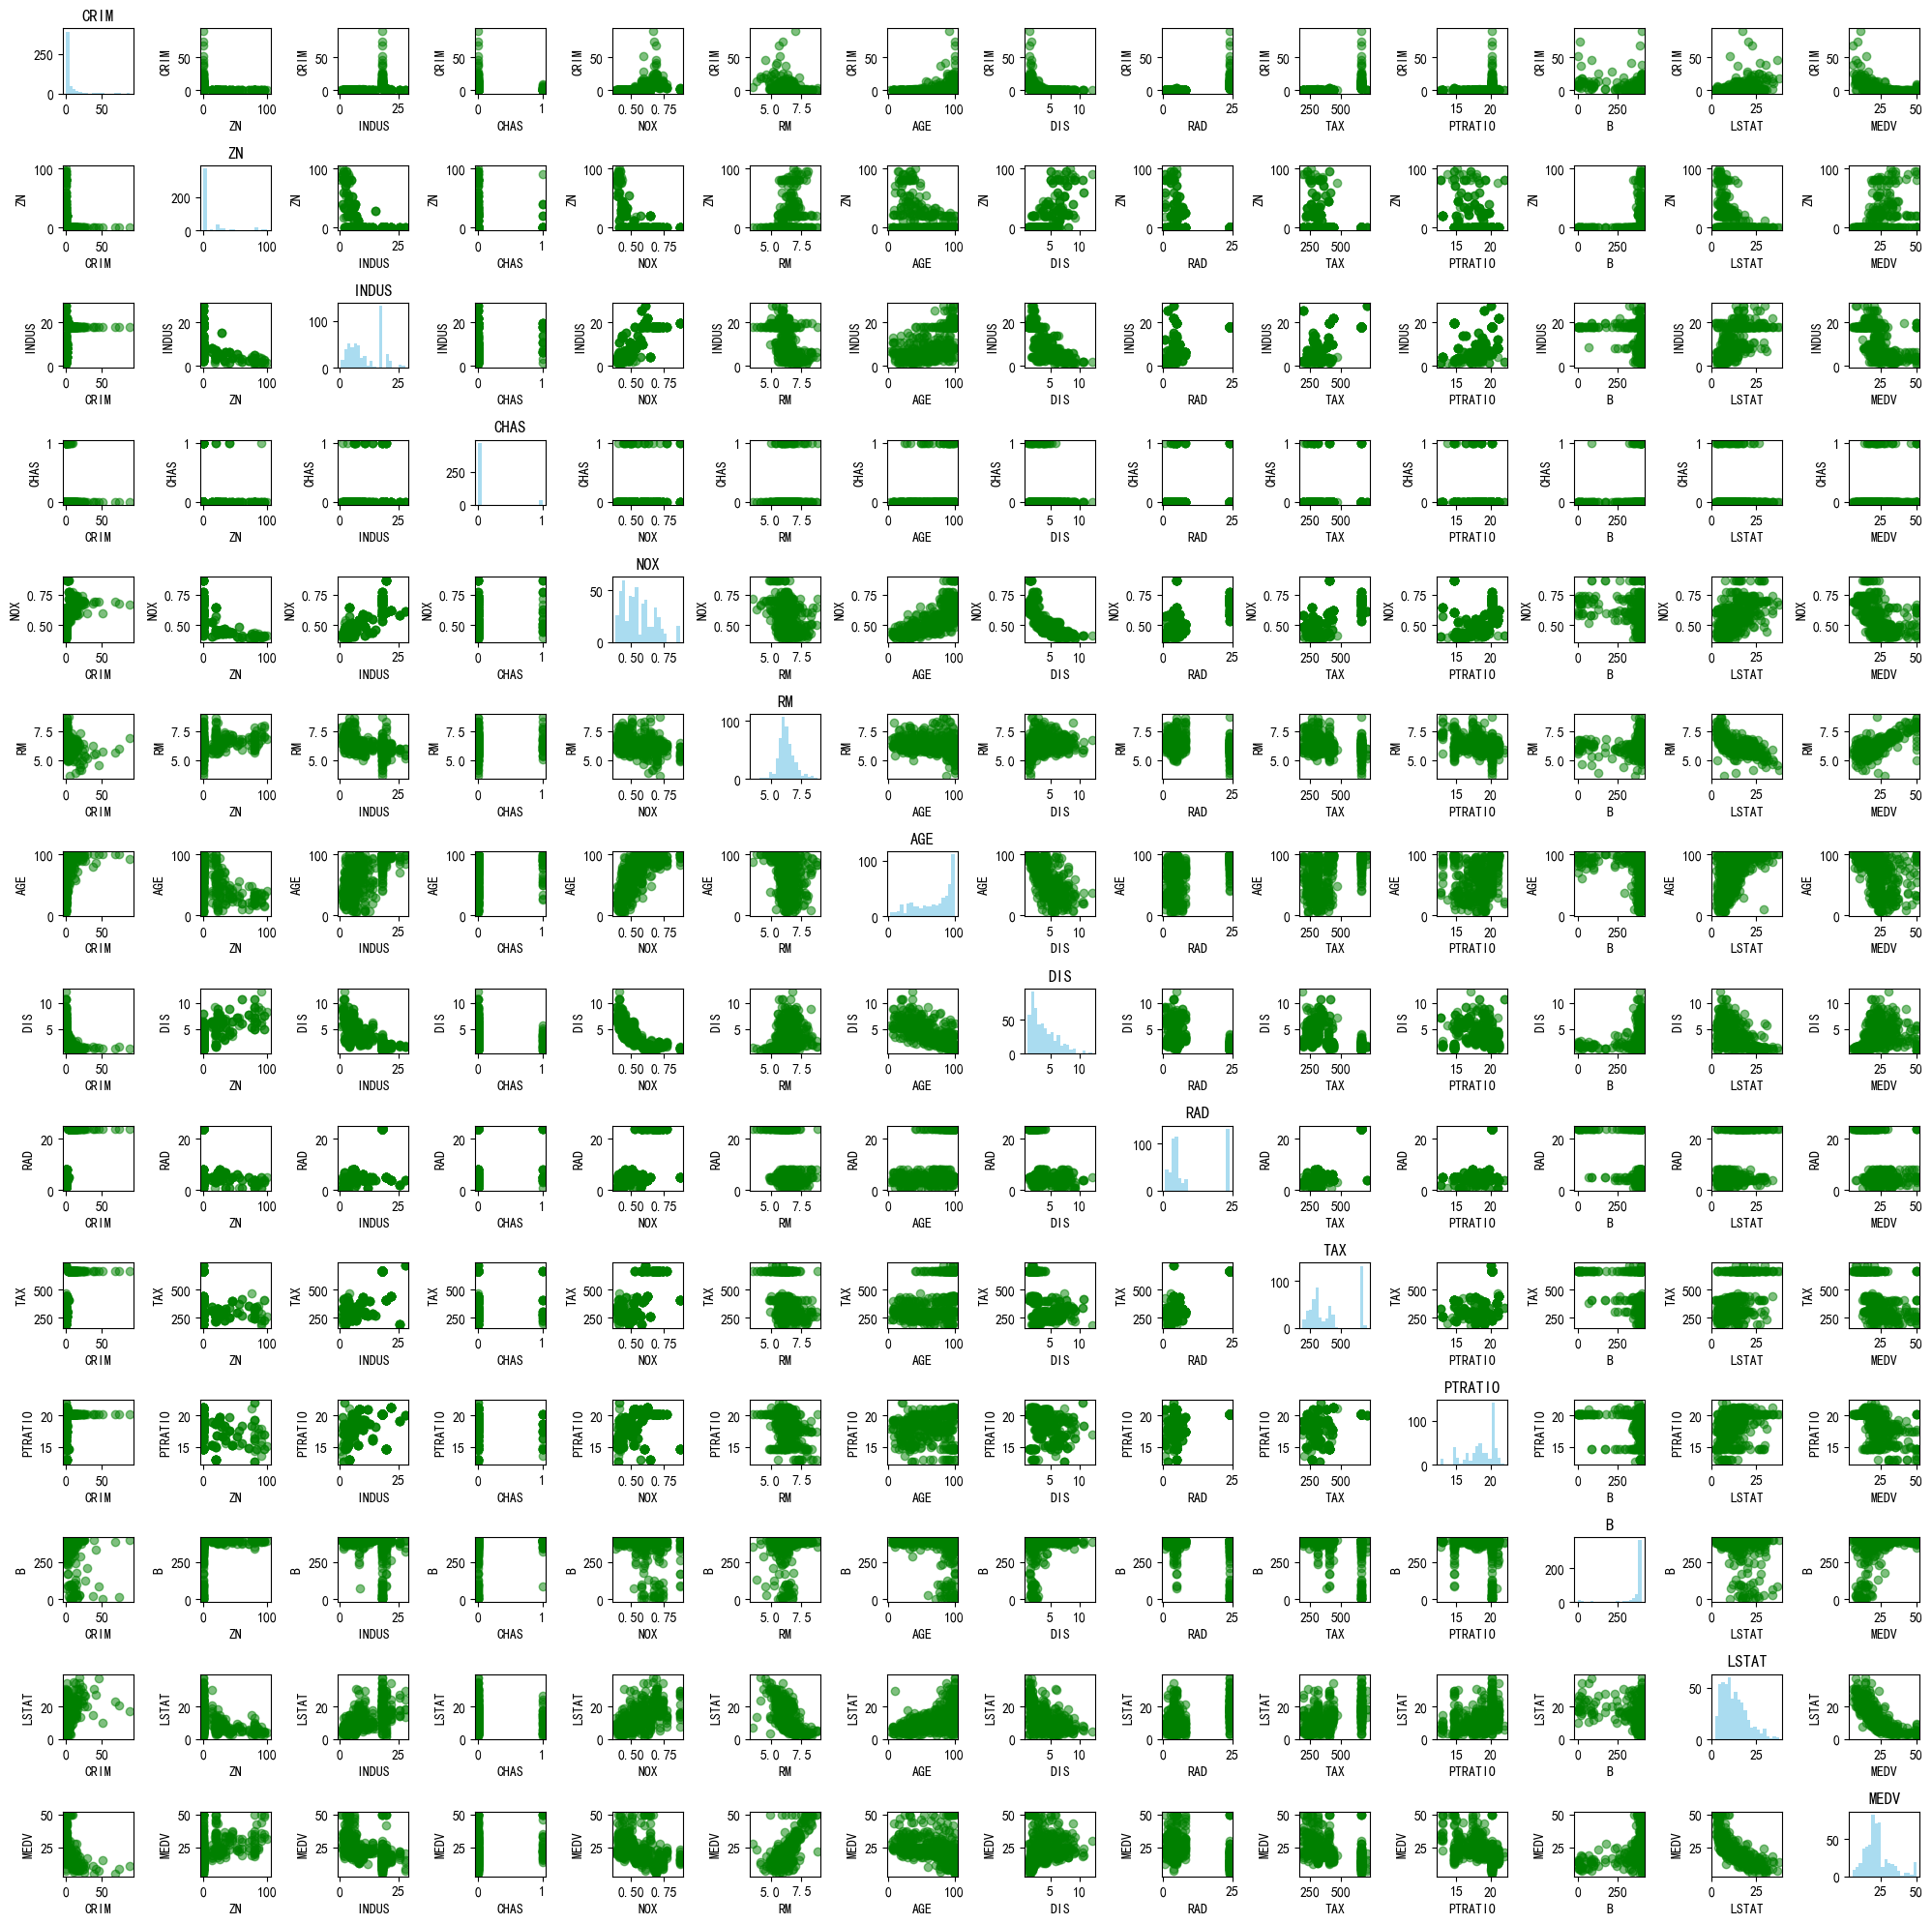

In [282]:
features = df.columns

# 创建散点图矩阵
fig, axes = plt.subplots(nrows=len(features), ncols=len(features), figsize=(20, 20))

# 填充子图
for i in range(len(features)):
    for j in range(len(features)):
        if i == j:
            # 绘制单变量分布图
            axes[i, j].hist(df[features[i]], bins=20, color='skyblue', alpha=0.7)
            axes[i, j].set_title(features[i])
        else:
            # 绘制散点图
            axes[i, j].scatter(df[features[j]], df[features[i]], alpha=0.5, color='green')
            axes[i, j].set_xlabel(features[j])
            axes[i, j].set_ylabel(features[i])

plt.tight_layout()
plt.show()

使特征之间的相关性更加直观地体现

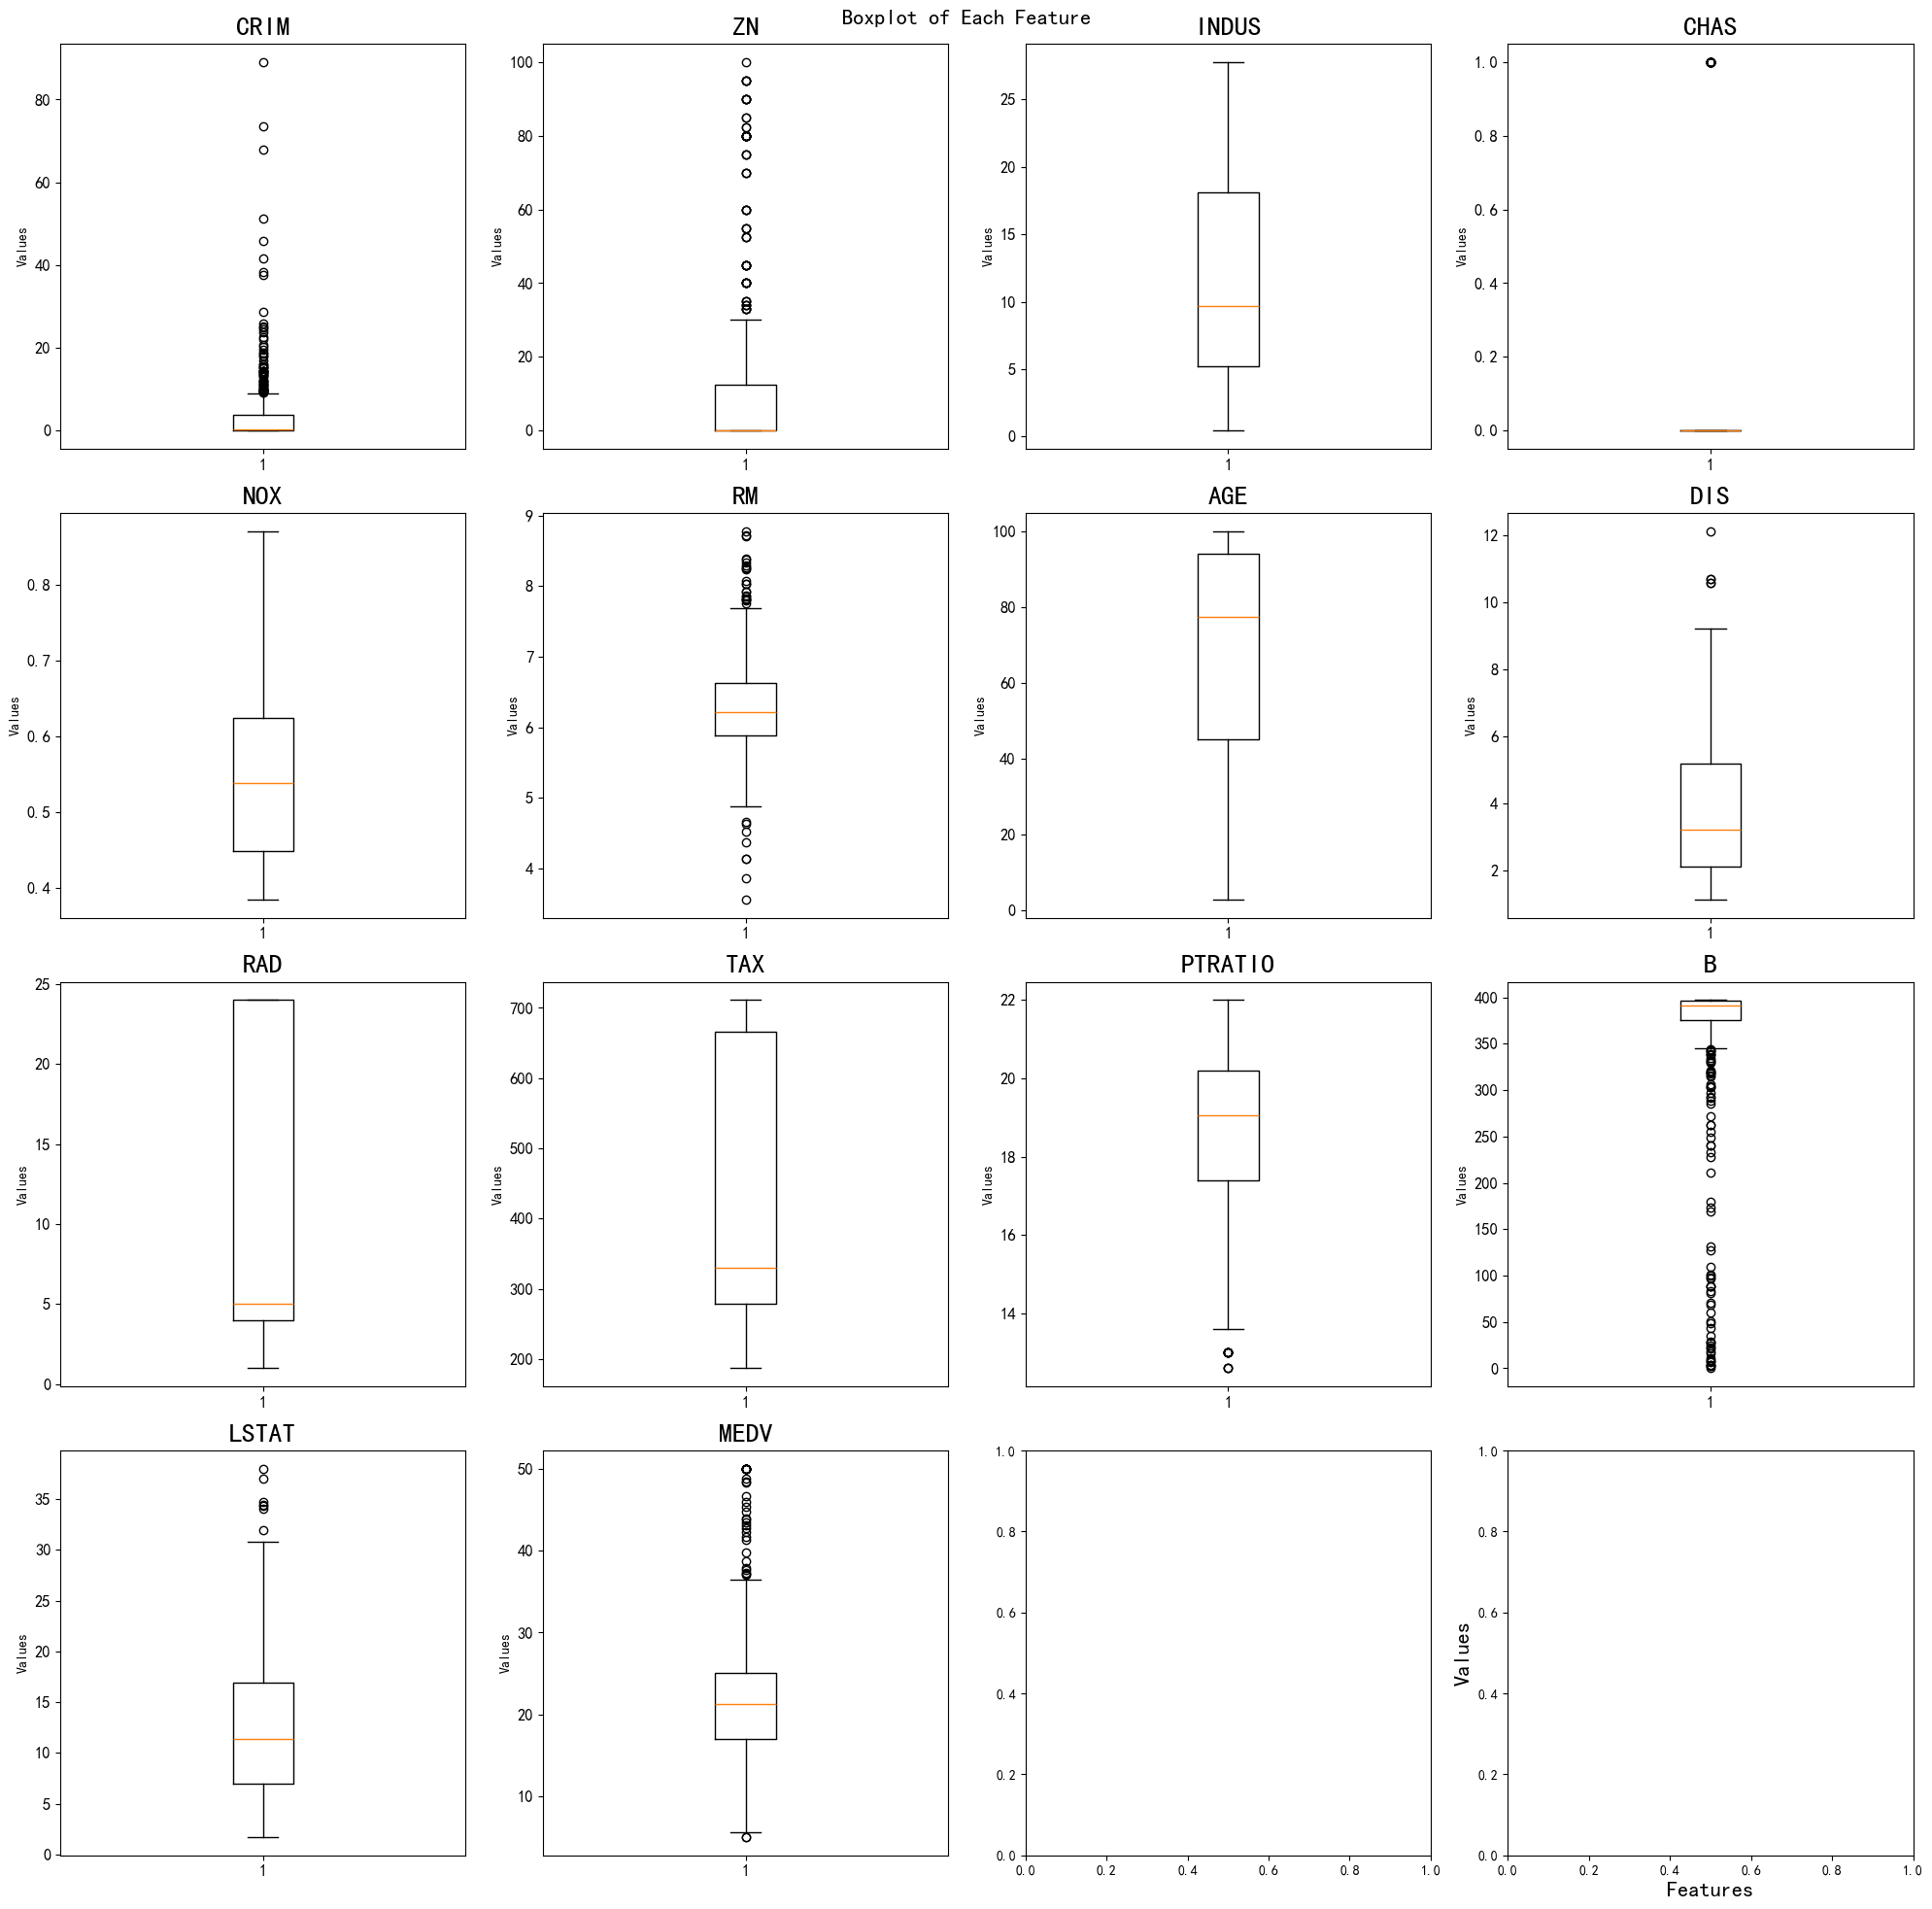

In [283]:
num_cols_per_row = 4  # 每行的子图数量
num_rows = (len(features) + num_cols_per_row - 1) // num_cols_per_row  # 总行数
# 设置图形大小
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 5*num_rows))
# 遍历每个特征，绘制箱线图
for i, column in enumerate(features):
    row_index = i // num_cols_per_row  #计算行索引
    col_index = i % num_cols_per_row   #计算列索引
    ax = axes[row_index, col_index]    #获取当前子图
    ax.boxplot(df[column])
    ax.set_title(column, fontsize=20)  #设置特征名字体大小为20
    ax.set_ylabel('Values')
    ax.tick_params(axis='x', labelsize=12)  #设置x轴刻度字体大小
    ax.tick_params(axis='y', labelsize=12)  #设置y轴刻度字体大小
    
# 设置箱线图的其他属性（标题、轴标签等）
plt.suptitle('Boxplot of Each Feature', fontsize=16)  #设置整体标题字体大小为16
plt.xlabel('Features', fontsize=16)  #设置x轴标签字体大小
plt.ylabel('Values', fontsize=16)   #设置y轴标签字体大小

plt.tight_layout()
plt.show()

画出每个特征的箱型图，直观表现出四分位数，中位数，离群点分布

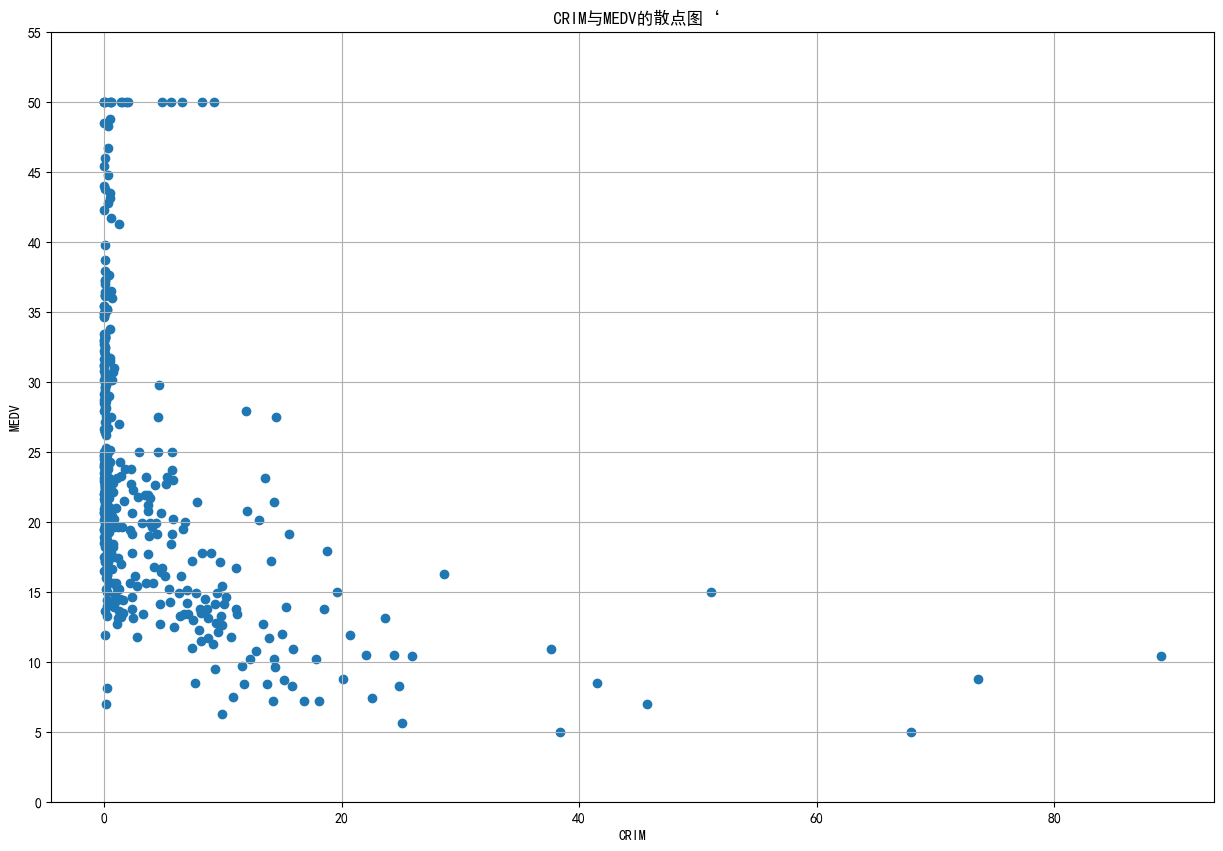

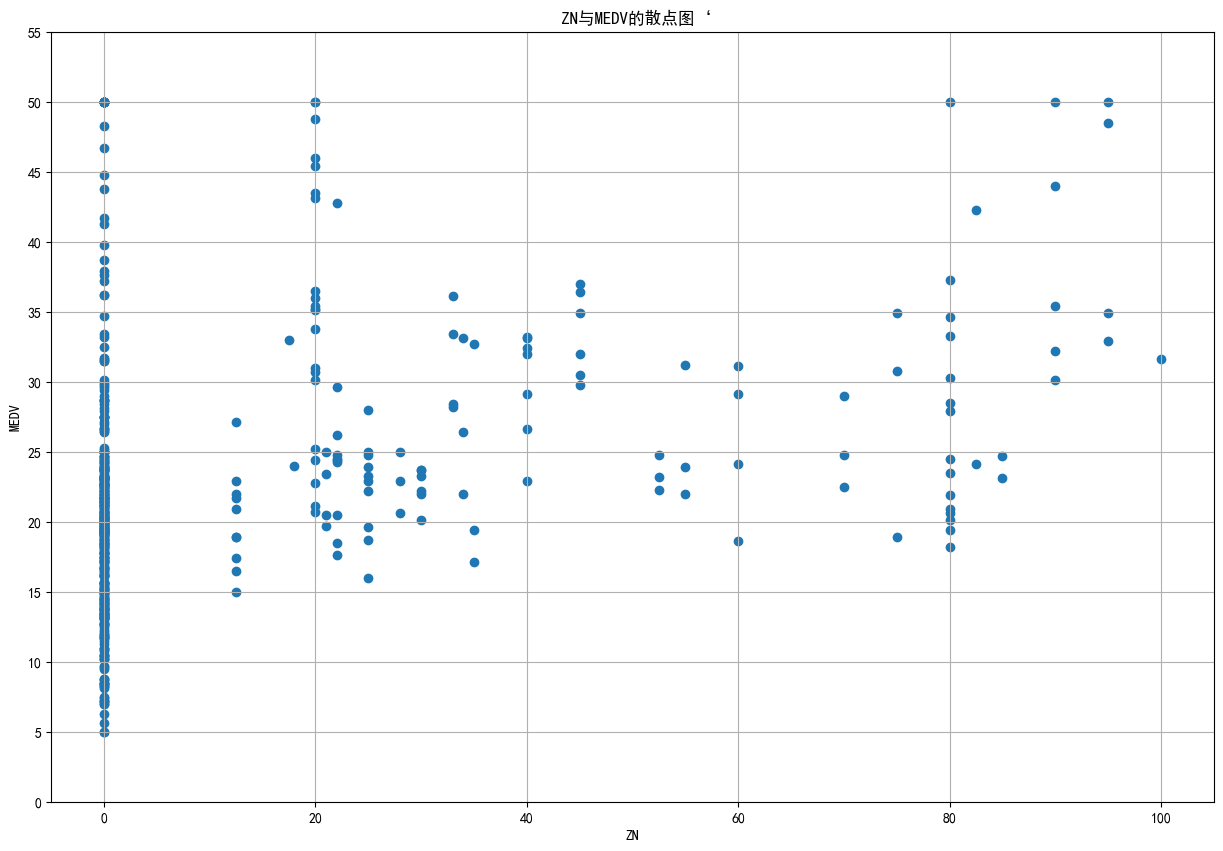

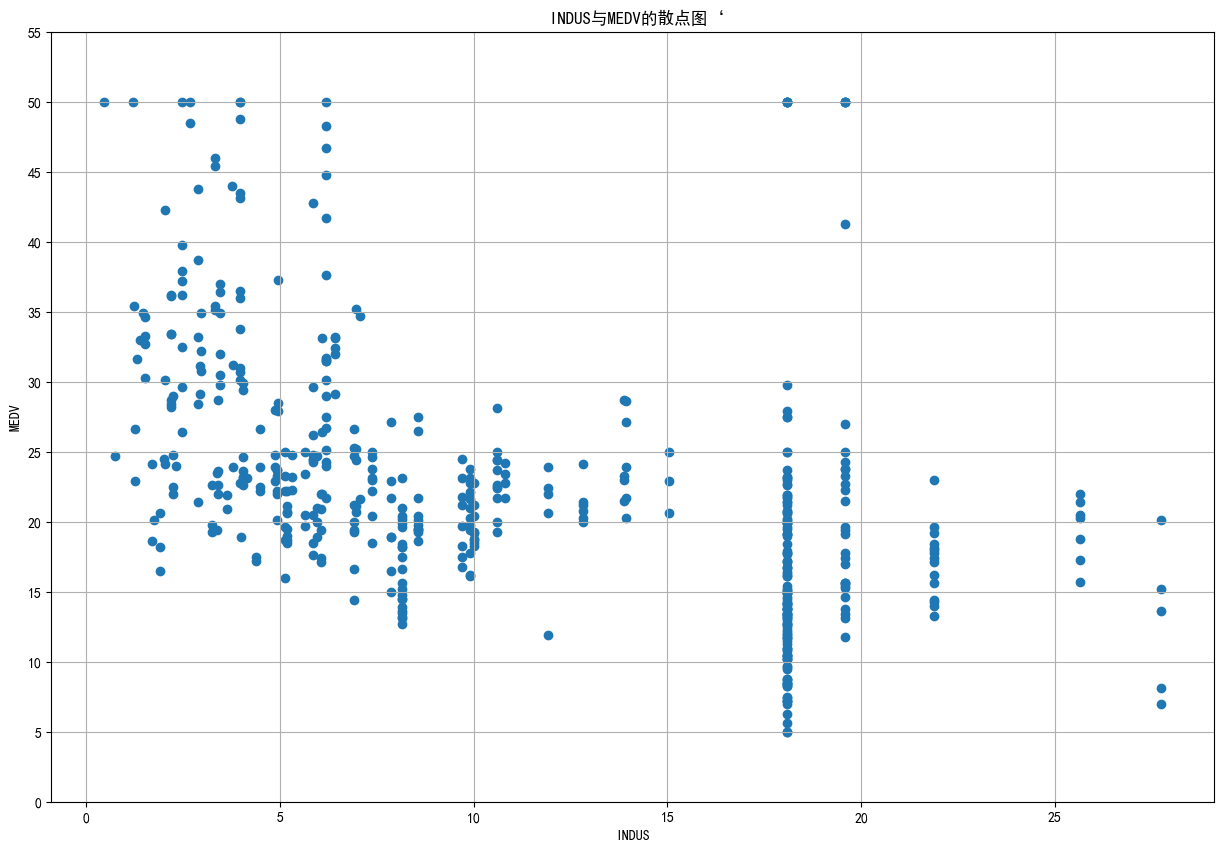

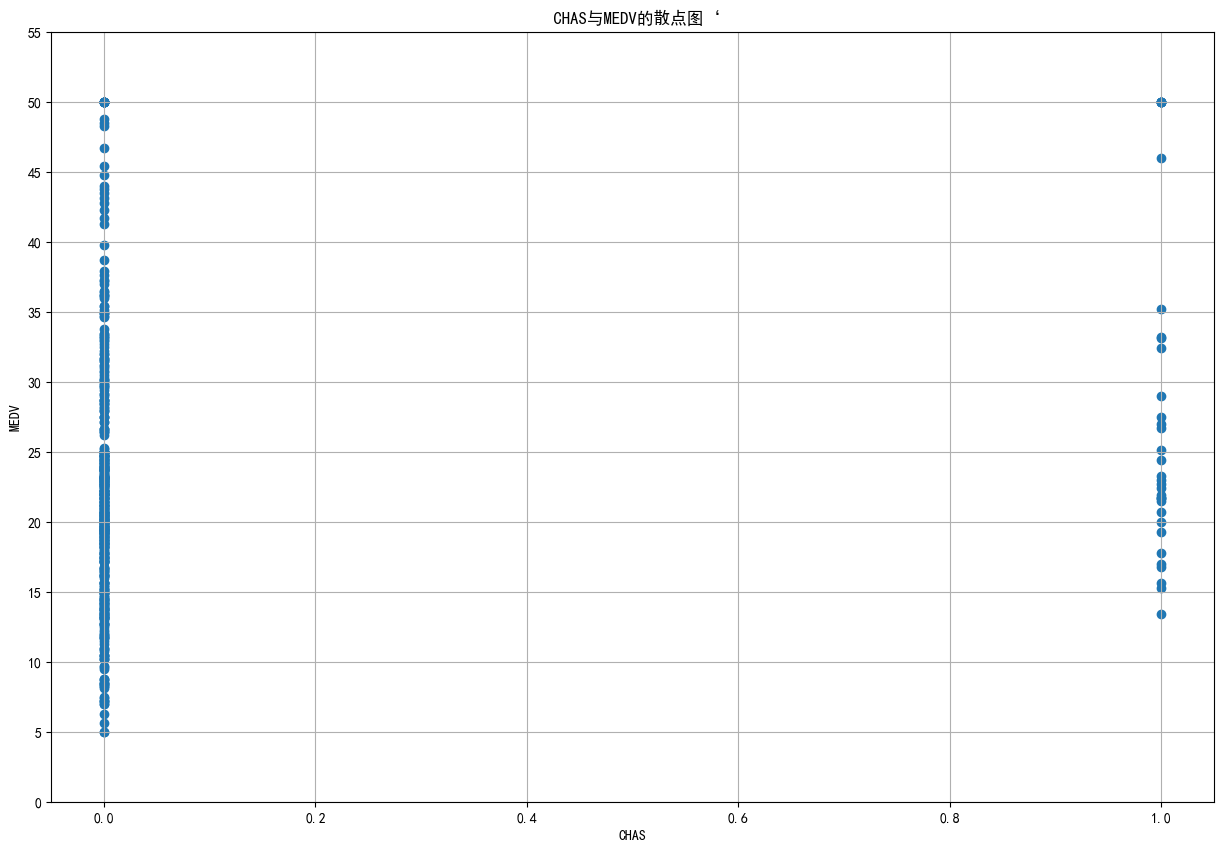

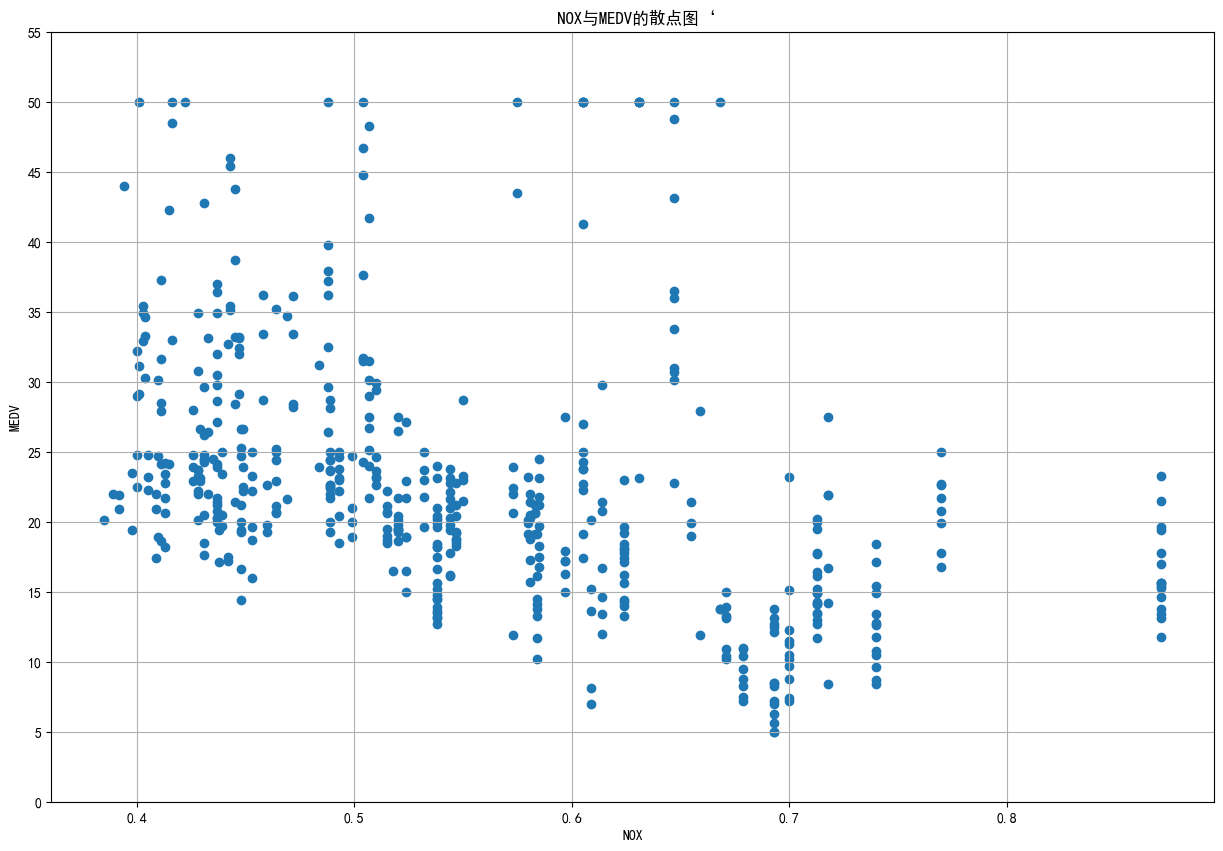

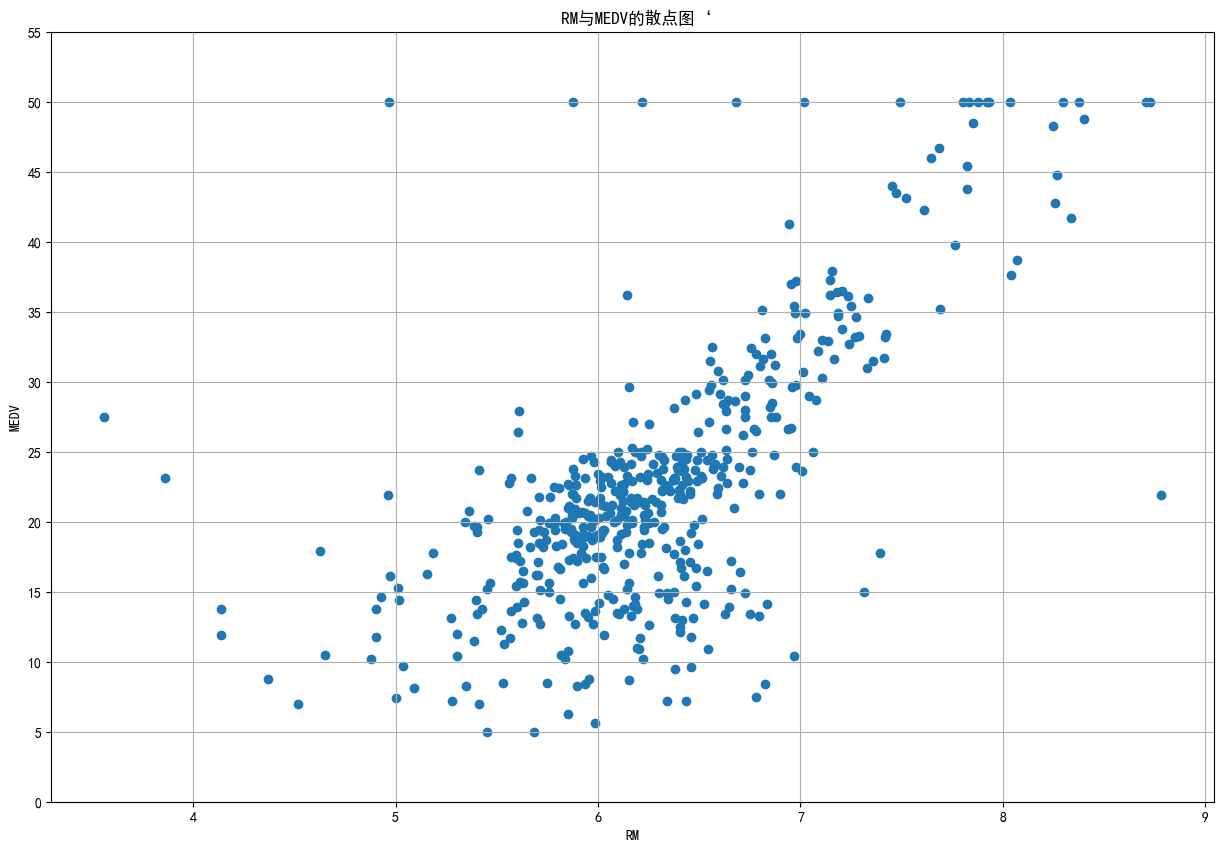

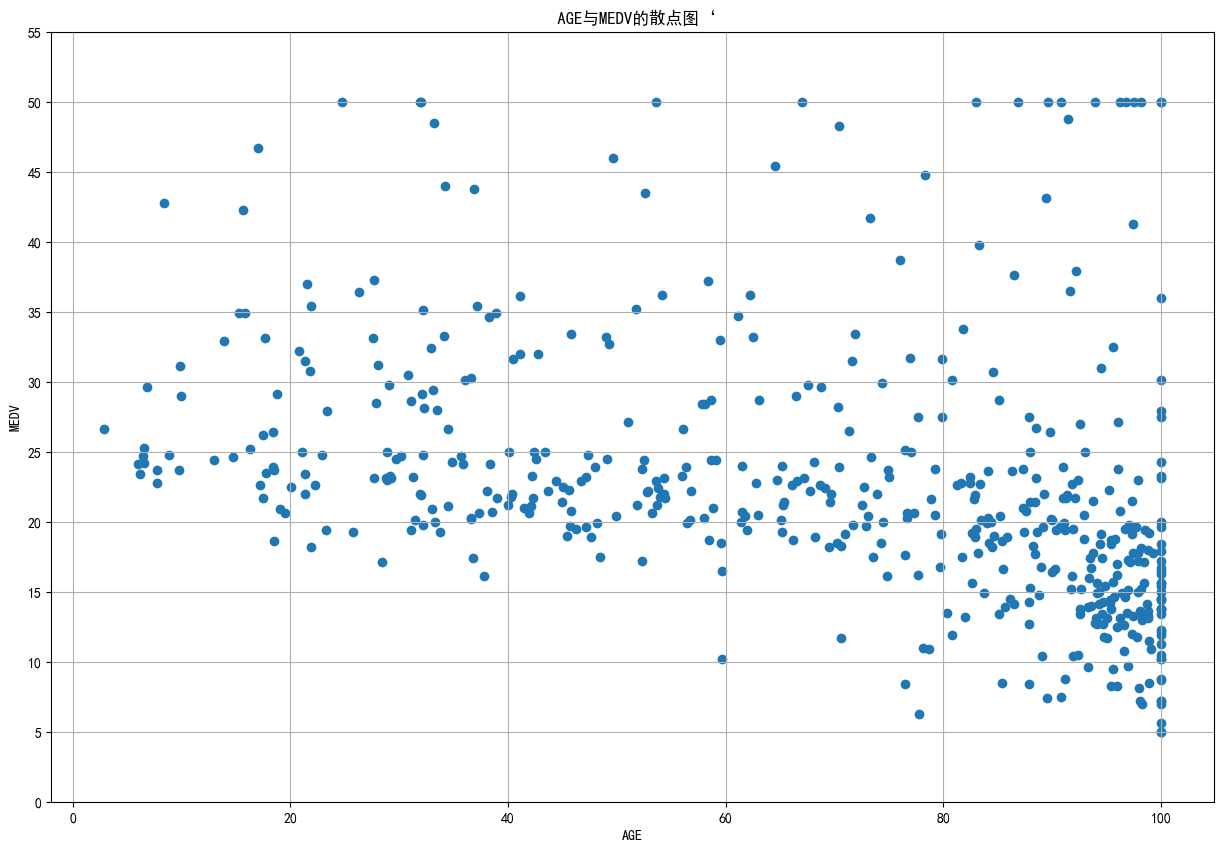

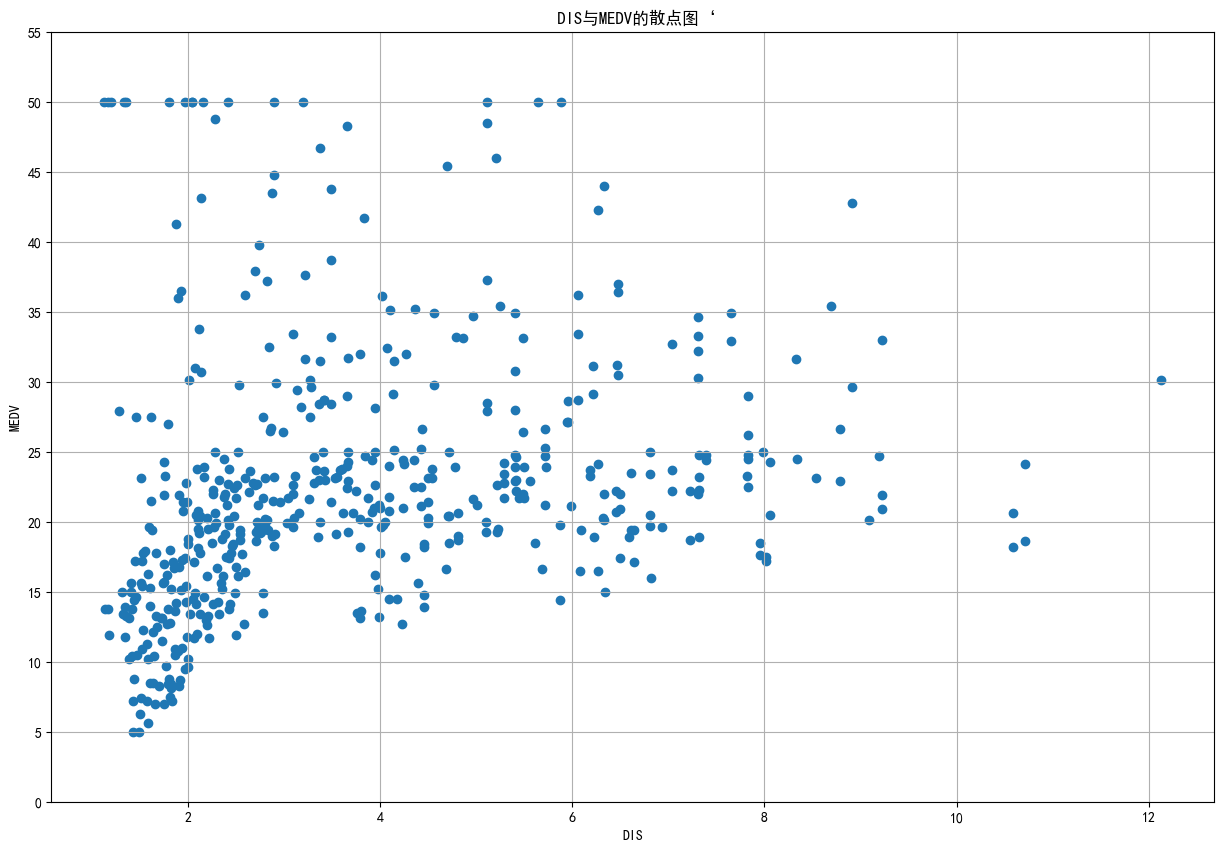

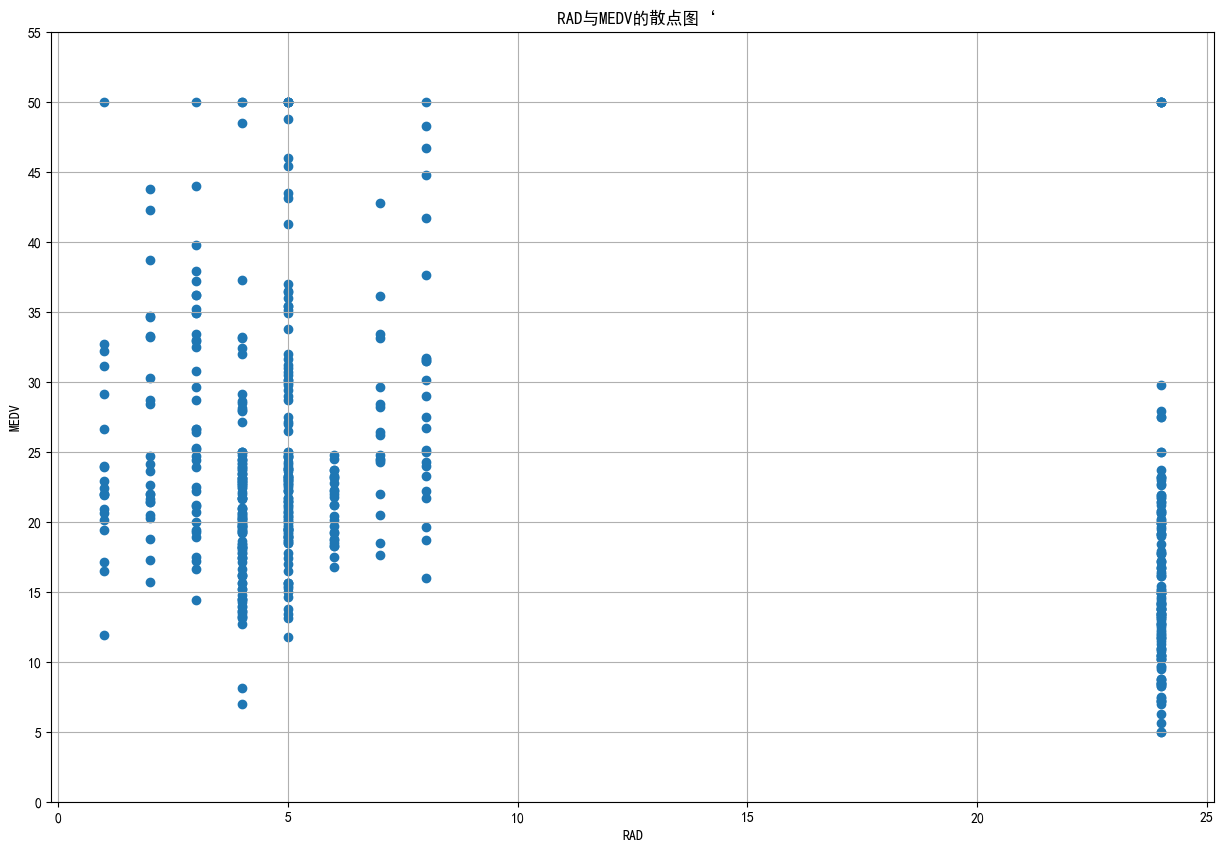

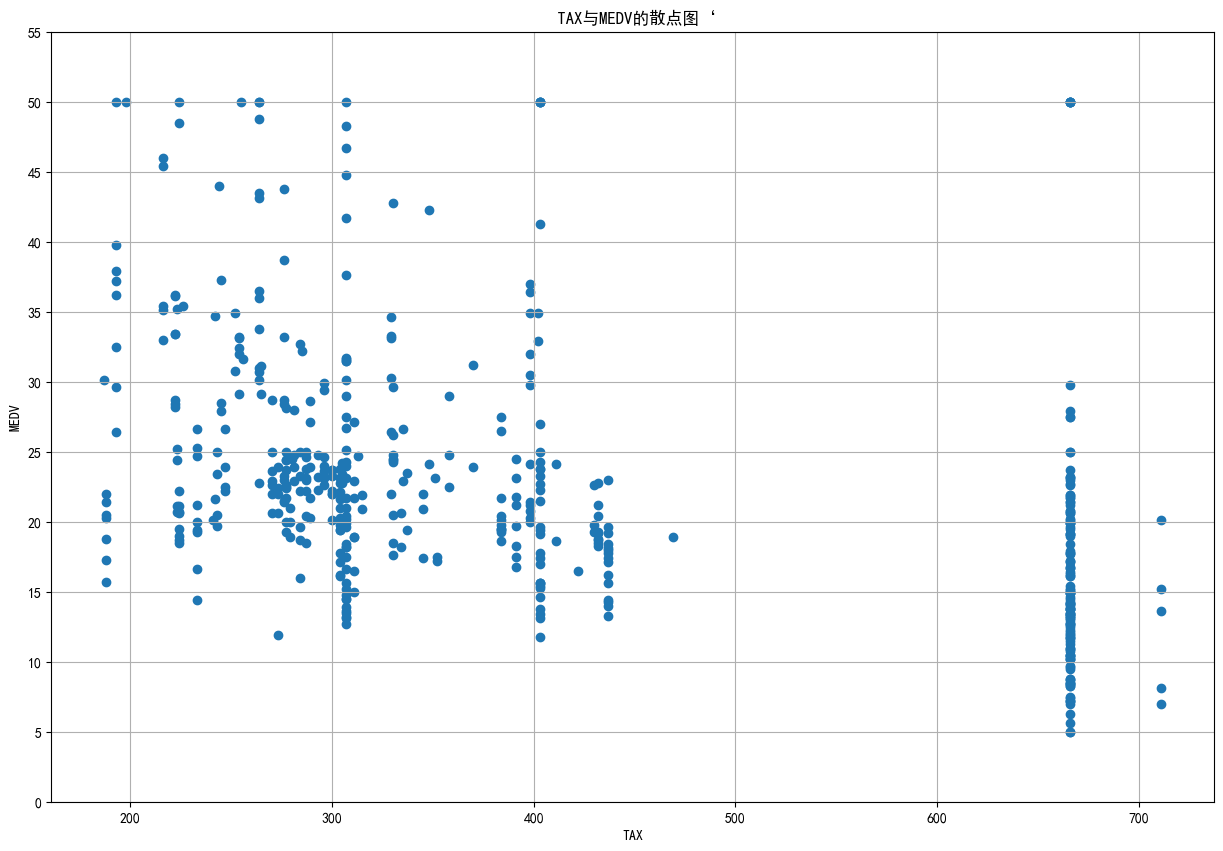

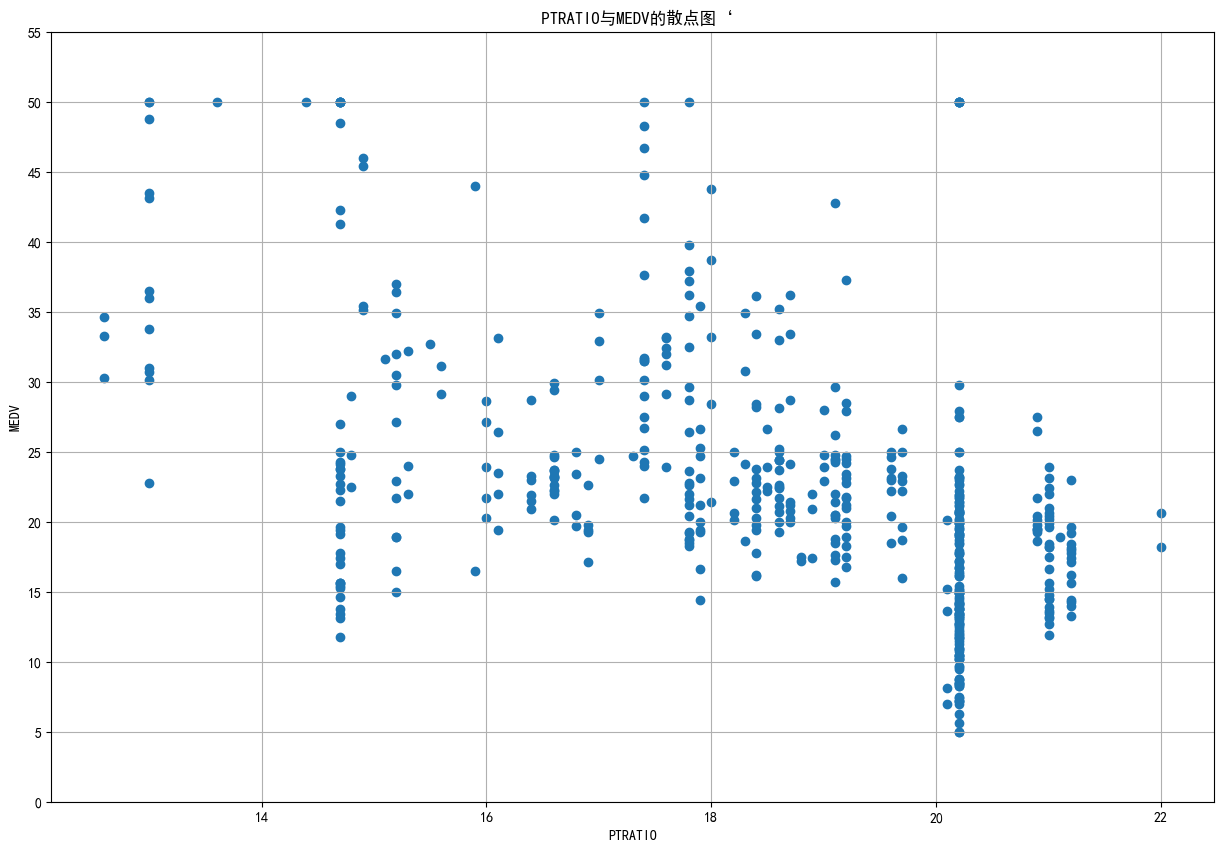

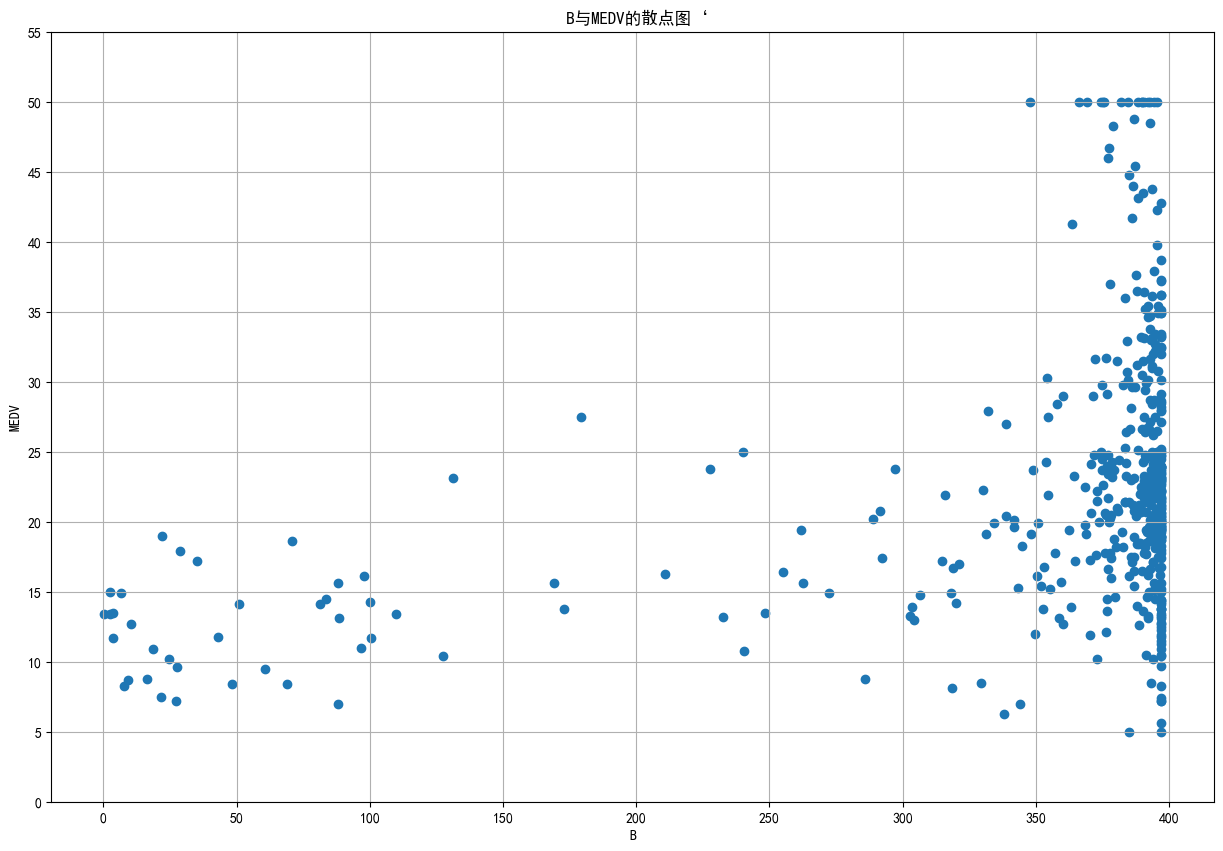

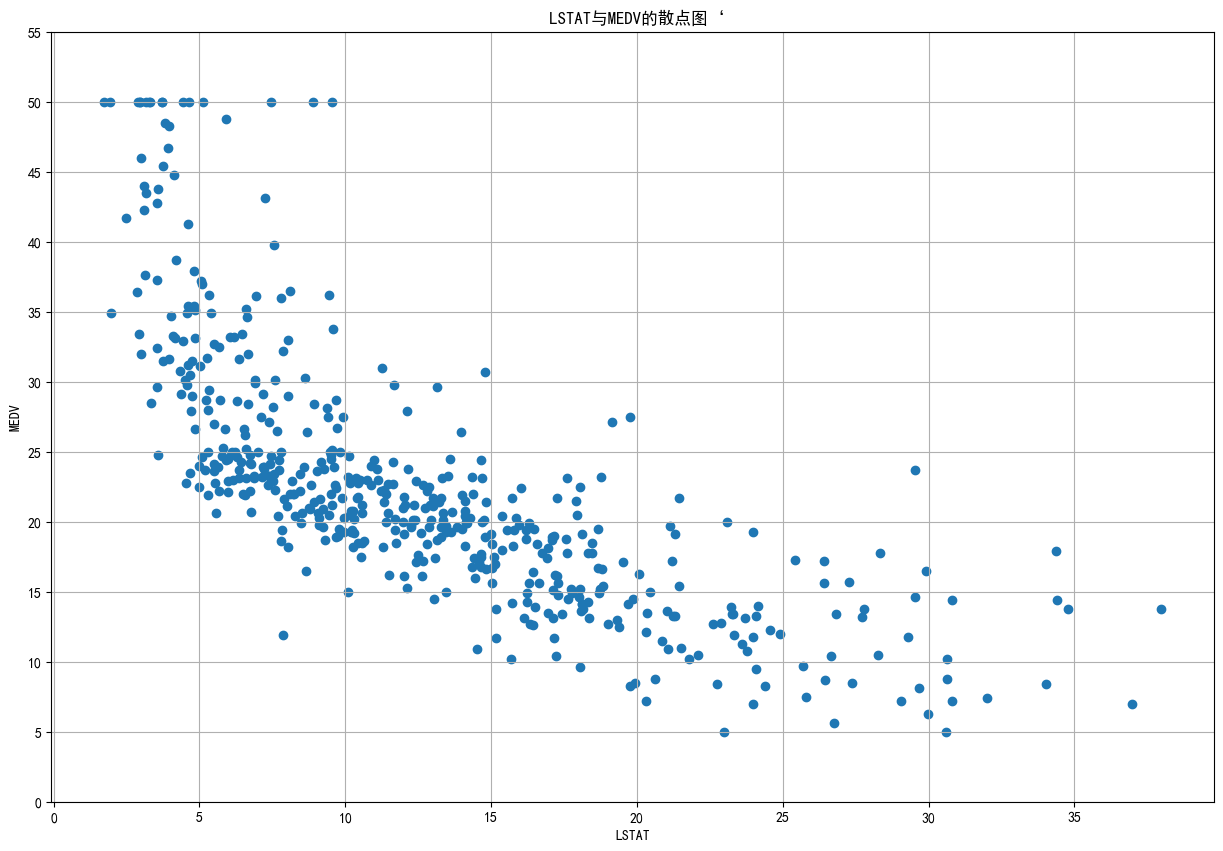

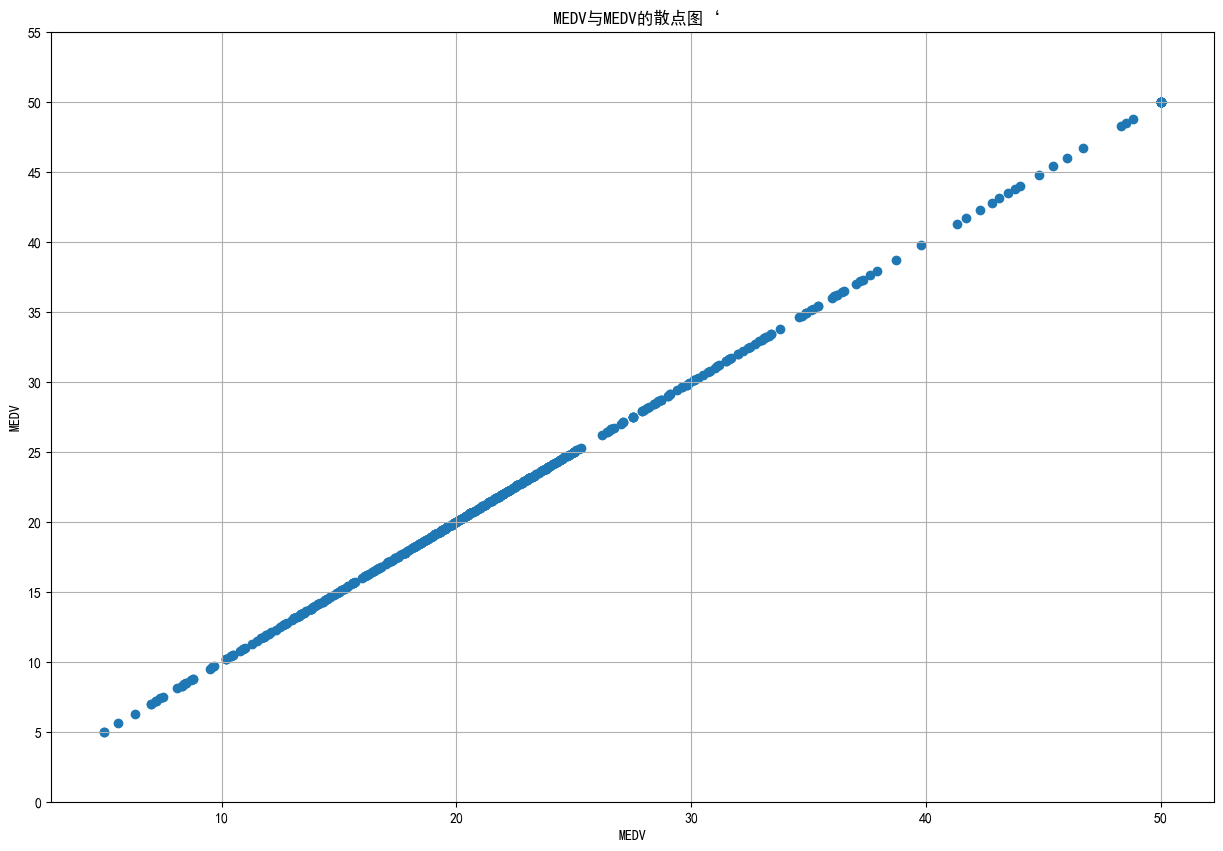

In [284]:
plt.style.use({'figure.figsize': (15, 10)})  #改变图片大小
for each in df.columns:
    plt.scatter(df[each], df['MEDV'])
    plt.title(' {}与MEDV的散点图‘'.format(each))
    plt.xlabel(each)
    plt.ylabel('MEDV')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()

根据每个特征与房价的散点图及以上数据可视化分析，非商用地INDUS,一氧化氮浓度NOX，房间数RM，学生教师比例PTRATIO,低收入阶层占比LSTAT与房价MEDV相关性较强

In [285]:
def standardization(data):#正则化
    mean_vals = data.mean()
    std_devs = data.std()
    standardized_data = (data - mean_vals) / std_devs
    return standardized_data

In [286]:
def train_test_split(data, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
        #如果random_state不为None，就使用np.random.seed()函数设置随机数种子。这样做可以确保每次运行代码时得到相同的随机分割结果
    shuffled_indices = np.random.permutation(len(data))
    #通过np.random.permutation(len(data))生成一个0到len(data)-1的随机排列数组，表示数据集的索引，并将其赋值给shuffled_indices。这一步是为了随机化数据集的顺序
    test_set_size = int(len(data) * test_size)
    #计算测试集的大小，这里使用了test_size参数来确定测试集大小。test_size是一个比例，乘以数据集的大小得到测试集的样本数量，并将其转换为整数
    test_indices = shuffled_indices[:test_set_size]
    #根据测试集的大小，将shuffled_indices分割为测试集和训练集的索引。前test_set_size个索引对应测试集，其余的对应训练集
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [287]:
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # 添加一列全为1的偏置项
    # 使用模型参数进行预测
    y_pred = X_b.dot(theta)
    return y_pred

In [288]:
def linear_regression(X, y):
    # 添加偏置项
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # 添加一列全为1的偏置项
    
    # 计算最优参数
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)#公式
    
    return theta_best

In [289]:
X = df.iloc[:, :13]  # 选择前13列作为特征X
y = df.iloc[:, -1]   # 选择最后一列作为目标变量y


In [290]:
X_train, X_test= train_test_split(X, test_size=0.2, random_state=888)#随机打乱样本
X_train=standardization(X_train)#正则化
X_test=standardization(X_test)

In [291]:
y_train, y_test= train_test_split(y, test_size=0.2, random_state=888)#随机打乱

In [292]:
theta_best = linear_regression(X_train, y_train)

In [293]:
y_pred = predict(X_test, theta_best)

In [294]:
y_true_np = y_test.to_numpy()
y_pred_np = y_pred
tss = np.sum((y_true_np - np.mean(y_true_np))**2)# 计算总平方和（TSS）
rss = np.sum((y_true_np - y_pred_np)**2)# 计算残差平方和（RSS）
r_squared = 1 - (rss / tss)# 计算R²分数
print("R²分数:", r_squared)

R²分数: 0.7219939338840826


可以看出拟合效果较好

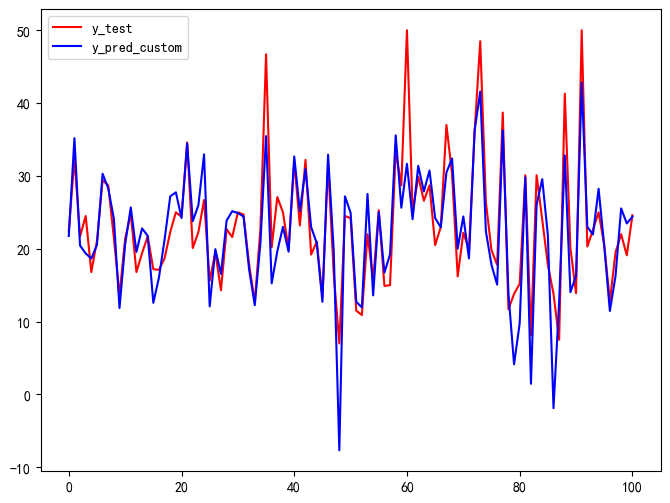

In [295]:
plt.figure(figsize=(8, 6))

plt.plot(y_test.values,c='r',label='y_test')
plt.plot(y_pred,c='b',label='y_pred_custom')
plt.legend()

拟合效果如上图所示

In [296]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=20000):
    
    X_b = np.c_[np.ones((X.shape[0], 1)), X]#加偏移项
    m = len(y)
    n_features = X_b.shape[1]
    theta = np.zeros((n_features, 1))
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)#公式2X.T(Xw-y)
        theta -= learning_rate * gradients
    
    return theta

In [297]:
y_train = y_train.to_numpy().reshape(-1, 1)#转成numpy数组
theta_best_grad= gradient_descent(X_train,y_train)
y_pred_grad=predict(X_test, theta_best_grad)
y_pred_grad_np = y_pred_grad.reshape(-1)#再转成一维数组
tss_grad = np.sum((y_true_np - np.mean(y_true_np))**2)# 计算总平方和（TSS）
rss_grad = np.sum((y_true_np - y_pred_grad_np)**2)# 计算残差平方和（RSS）
r_squared_grad = 1 - (rss_grad / tss_grad)# 计算R²分数
print("R²分数:", r_squared_grad)

R²分数: 0.7219939338859849


可以看出预测值与真实值较匹配

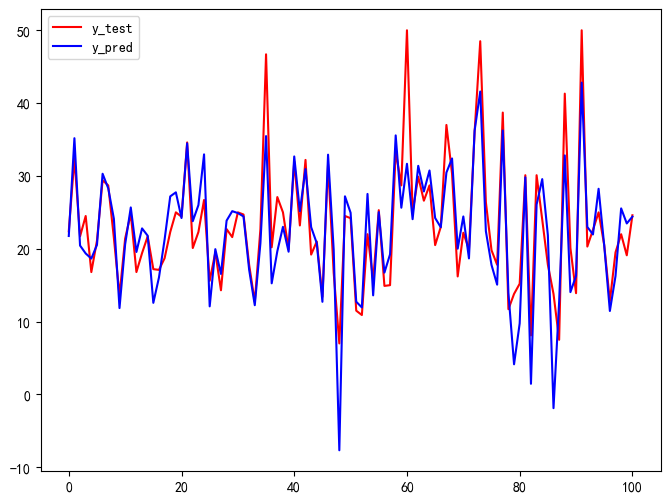

In [298]:
plt.figure(figsize=(8, 6))

plt.plot(y_test.values,c='r',label='y_test')
plt.plot(y_pred_grad,c='b',label='y_pred')
plt.legend()


梯度下降拟合效果如上图所示